# #8 Min-Variance Portfolio

1. 최소-분산 포트폴리오를 구하고 그래프로 그려본다.
2. method using `minimize` in `scipy.optimize`
3.
4. pypfopt 패키지와 pulp를 이용하는 방법


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# import cvxopt as opt
# from cvxoppt import solvers
# solvers.options['show_progress'] = False

In [ ]:
tickers = ['AAPL', 'GOOGL', 'AMZN']
df = yf.download(tickers, start='2019-01-01')['Adj Close']

ret = df.pct_change(1).dropna()
ret.head()

[*********************100%***********************]  3 of 3 completed


,AAPL,AMZN,GOOGL
Date,,,
2019-01-03,-0.099607,-0.025241,-0.027696
2019-01-04,0.042689,0.050064,0.051294
2019-01-07,-0.002226,0.034353,-0.001994
2019-01-08,0.019063,0.016612,0.008783
2019-01-09,0.016982,0.001714,-0.003427


In [ ]:
ret_mtx = ret.values.T
ret_mtx

array([[-0.09960744,  0.0426892 , -0.00222581, ..., -0.00585988,
         0.00048668, -0.0056753 ],
       [-0.0252415 ,  0.050064  ,  0.03435341, ..., -0.01274489,
         0.00231095, -0.00755285],
       [-0.02769565,  0.05129358, -0.00199427, ..., -0.012471  ,
        -0.00348094, -0.02071483]])

In [ ]:
# generate random weights
def rand_weights(n):
    i = np.random.rand(n)
    return i / sum(i)

# generate a random portfolio
def rand_portfolio(returns):
    '''
    returns the mean & std_dev of a random portfolio returns
    '''
    r = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))

    mean = w * r.T
    variance = np.sqrt(w * C * w.T)

    # this recursion reduces outliers to make plots pretty
    if variance > 2:
        return rand_portfolio(returns)

    return mean, variance, w

제대로 동작하는지 체크:

In [ ]:
m, v, w = rand_portfolio(ret_mtx)
print(m, v, w)

[[0.00096979]] [[0.01909099]] [[0.21336026 0.45904607 0.32759367]]


In [ ]:
w.sum()

1.0

In [ ]:
portfolios = []
for i in range(500):
    m, s, w = rand_portfolio(ret_mtx)

In [ ]:
means = port_ret_var

## 2. method using `minimize` in `scipy.optimize`:

scipy.optimize의 minimize를 이용하고(method='SLSQP') weight에 대한 적절한 constraints와 bounds를 설정하여

min-variance portfolio (최소-분산 포트폴리오)를 plot한다:

[*********************100%***********************]  3 of 3 completed


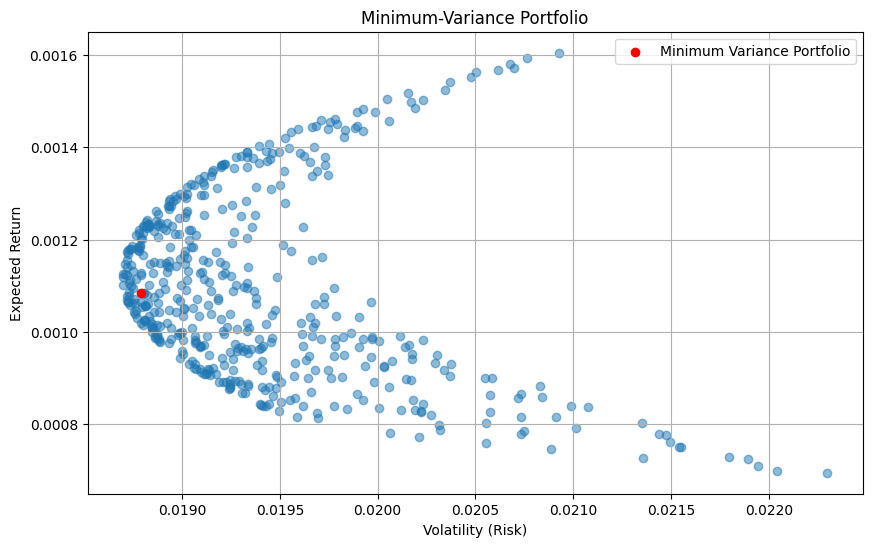

Minimum Variance Portfolio:
Weights: [0.33333333 0.33333333 0.33333333]
Expected Return: 0.0010843609173264964
Volatility: 0.018790403102529944


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tickers = ['AAPL', 'GOOGL', 'AMZN']
df = yf.download(tickers, start='2019-01-01')['Adj Close']
returns = df.pct_change(1).dropna()

# 공분산 행렬 계산
cov_matrix = returns.cov()

# 포트폴리오 종목 비중 초기화: uniform weights로
num_assets = len(returns.columns)
weights = np.ones(num_assets) / num_assets

# 최적화 함수로 최소 분산 포트폴리오 계산
from scipy.optimize import minimize

def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # 비중 합계는 1
bounds = tuple((0, 1) for _ in range(num_assets))  # 각 비중은 0과 1 사이

result = minimize(portfolio_variance, weights, args=(cov_matrix,),
                  method='SLSQP', constraints=constraints, bounds=bounds)

optimal_weights = result.x
min_variance = result.fun

# 최소 분산 포트폴리오 수익률 계산
expected_returns = returns.mean()
min_portfolio_return = np.dot(expected_returns, optimal_weights)

# 포트폴리오 시뮬레이션
n_simulations = 500
returns_simulated = np.zeros(n_simulations)
volatility_simulated = np.zeros(n_simulations)

for i in range(n_simulations):
    weights_simulated = np.random.dirichlet(np.ones(num_assets), size=1).flatten()
    returns_simulated[i] = np.dot(expected_returns, weights_simulated)
    volatility_simulated[i] = np.sqrt(portfolio_variance(weights_simulated, cov_matrix))

# 최소 분산 포트폴리오 그래프
plt.figure(figsize=(10, 6))
plt.scatter(volatility_simulated, returns_simulated, marker='o', alpha=0.5)
plt.scatter(np.sqrt(min_variance), min_portfolio_return, marker='o', color='red', label='Minimum Variance Portfolio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Minimum-Variance Portfolio')
plt.legend()
plt.grid(True)
plt.show()

# Print minimum variance portfolio details
print('Minimum Variance Portfolio:')
print('Weights:', optimal_weights)
print('Expected Return:', min_portfolio_return)
print('Volatility:', np.sqrt(min_variance))

[*********************100%***********************]  3 of 3 completed


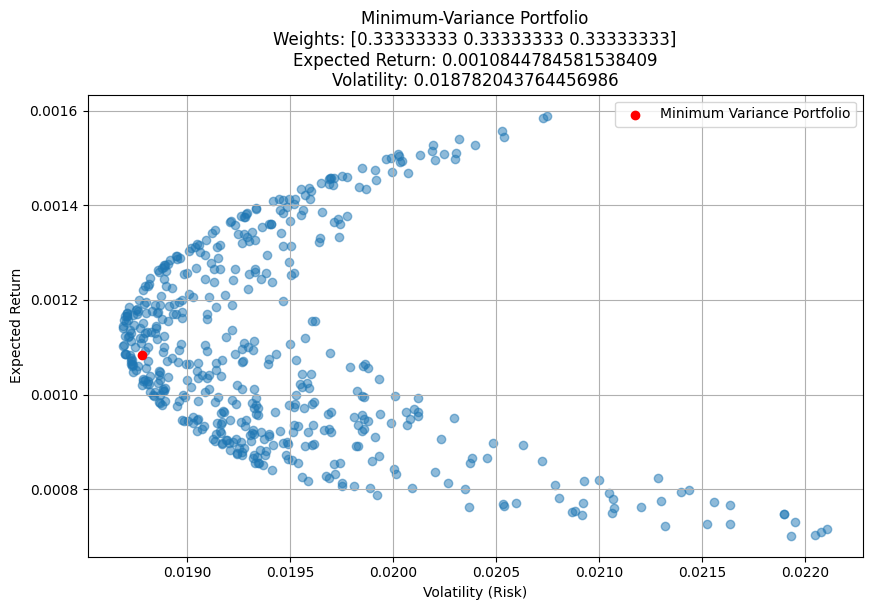

In [ ]:
# 위 코드에서 plt.title 부분만 수정했다:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tickers = ['AAPL', 'GOOGL', 'AMZN']
df = yf.download(tickers, start='2019-01-01')['Adj Close']
returns = df.pct_change(1).dropna()

# 공분산 행렬 계산
cov_matrix = returns.cov()

# 포트폴리오 종목 비중 초기화: uniform weights로
num_assets = len(returns.columns)
weights = np.ones(num_assets) / num_assets

# 최적화 함수로 최소 분산 포트폴리오 계산
from scipy.optimize import minimize

def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # 비중 합계는 1
bounds = tuple((0, 1) for _ in range(num_assets))  # 각 비중은 0과 1 사이

result = minimize(portfolio_variance, weights, args=(cov_matrix,),
                  method='SLSQP', constraints=constraints, bounds=bounds)

optimal_weights = result.x
min_variance = result.fun

# 최소 분산 포트폴리오 수익률 계산
expected_returns = returns.mean()
min_portfolio_return = np.dot(expected_returns, optimal_weights)

# 포트폴리오 시뮬레이션
n_simulations = 500
returns_simulated = np.zeros(n_simulations)
volatility_simulated = np.zeros(n_simulations)

for i in range(n_simulations):
    weights_simulated = np.random.dirichlet(np.ones(num_assets), size=1).flatten()
    returns_simulated[i] = np.dot(expected_returns, weights_simulated)
    volatility_simulated[i] = np.sqrt(portfolio_variance(weights_simulated, cov_matrix))

# 최소 분산 포트폴리오 그래프
plt.figure(figsize=(10, 6))
plt.scatter(volatility_simulated, returns_simulated, marker='o', alpha=0.5)
plt.scatter(np.sqrt(min_variance), min_portfolio_return, marker='o', color='red', label='Minimum Variance Portfolio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')

# 수정된 부분: optimal_weights, min_portfolio_return, np.sqrt(min_variance) 출력
title = f"Minimum-Variance Portfolio\nWeights: {optimal_weights}\nExpected Return: {min_portfolio_return}\nVolatility: {np.sqrt(min_variance)}"
plt.title(title)

plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  3 of 3 completed


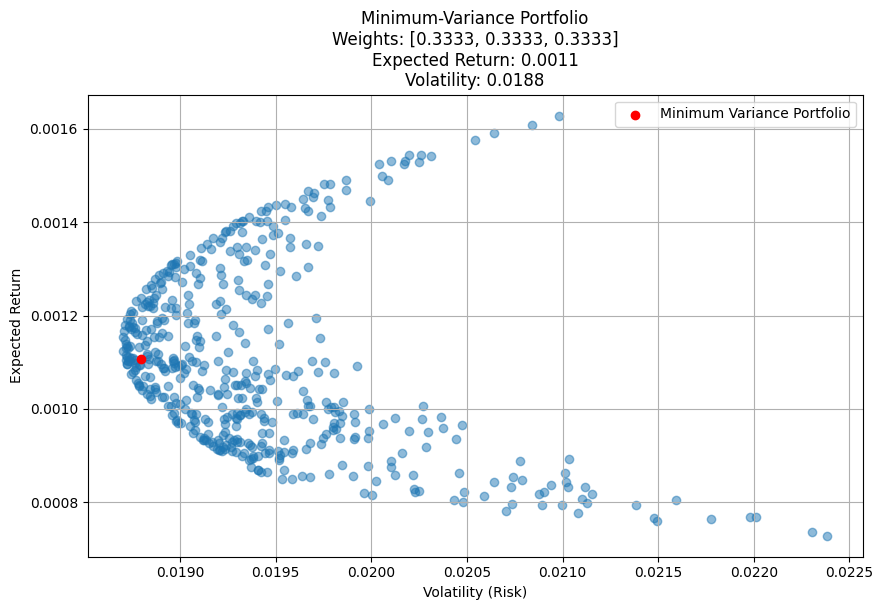

In [ ]:
# 다시 위 코드에서 title에 출력될 변수들을 소수점 네자리까지만 고려
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tickers = ['AAPL', 'GOOGL', 'AMZN']
df = yf.download(tickers, start='2019-01-01')['Adj Close']
returns = df.pct_change(1).dropna()

# 공분산 행렬 계산
cov_matrix = returns.cov()

# 포트폴리오 종목 비중 초기화: uniform weights로
num_assets = len(returns.columns)
weights = np.ones(num_assets) / num_assets

# 최적화 함수로 최소 분산 포트폴리오 계산
from scipy.optimize import minimize

def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # 비중 합계는 1
bounds = tuple((0, 1) for _ in range(num_assets))  # 각 비중은 0과 1 사이

result = minimize(portfolio_variance, weights, args=(cov_matrix,),
                  method='SLSQP', constraints=constraints, bounds=bounds)

optimal_weights = result.x
min_variance = result.fun

# 최소 분산 포트폴리오 수익률 계산
expected_returns = returns.mean()
min_portfolio_return = np.dot(expected_returns, optimal_weights)

# 포트폴리오 시뮬레이션
n_simulations = 500
returns_simulated = np.zeros(n_simulations)
volatility_simulated = np.zeros(n_simulations)

for i in range(n_simulations):
    weights_simulated = np.random.dirichlet(np.ones(num_assets), size=1).flatten()
    returns_simulated[i] = np.dot(expected_returns, weights_simulated)
    volatility_simulated[i] = np.sqrt(portfolio_variance(weights_simulated, cov_matrix))

# 최소 분산 포트폴리오 그래프
plt.figure(figsize=(10, 6))
plt.scatter(volatility_simulated, returns_simulated, marker='o', alpha=0.5)
plt.scatter(np.sqrt(min_variance), min_portfolio_return, marker='o', color='red', label='Minimum Variance Portfolio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')

# 수정된 부분: optimal_weights, min_portfolio_return, np.sqrt(min_variance) 소수점 아래 4자리 출력
optimal_weights_rounded = [round(weight, 4) for weight in optimal_weights]
min_portfolio_return_rounded = round(min_portfolio_return, 4)
min_variance_rounded = round(np.sqrt(min_variance), 4)
title = f"Minimum-Variance Portfolio\nWeights: {optimal_weights_rounded}\nExpected Return: {min_portfolio_return_rounded}\nVolatility: {min_variance_rounded}"
plt.title(title)
plt.legend()
plt.grid(True)
plt.show()

위 코드를 tickers, start_date, end_date와 n_simulations를 input으로 받고

위 Minimum Variance portfolio와 임의의 weights들에 대한 포트폴리오들을 plot시킨 그래프를 전부 출력시키는 함수로 만들자:

[*********************100%***********************]  5 of 5 completed


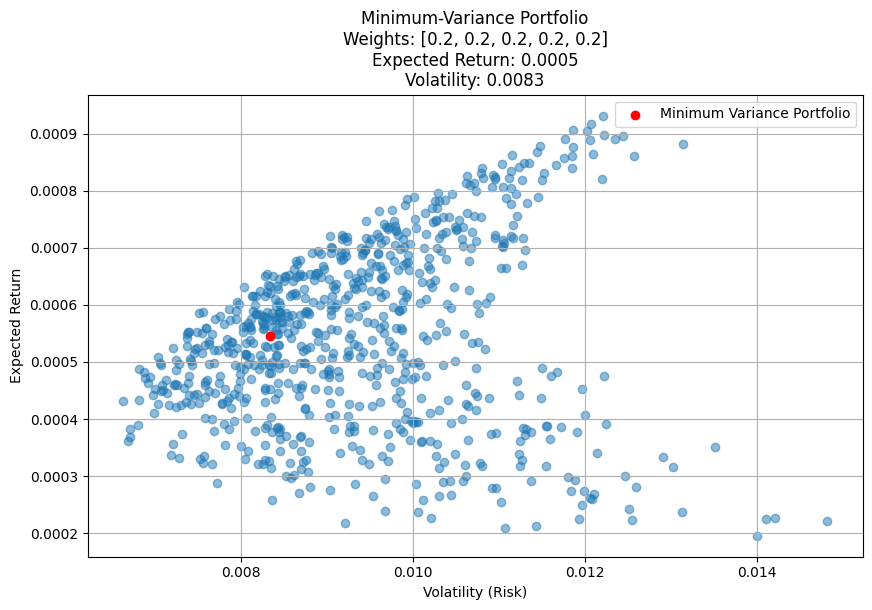

In [ ]:
# Minimum Variance portfolio와 임의의 weights들에 대한 포트폴리오들을 plot시킨 그래프를 전부 출력시키는 함수
def plot_MVP(tickers, start_date, end_date, n_simulations):
    df = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    returns = df.pct_change(1).dropna()

    # 공분산 행렬 계산
    cov_matrix = returns.cov()

    # 포트폴리오 종목 비중 초기화: uniform weights로
    num_assets = len(returns.columns)
    weights = np.ones(num_assets) / num_assets

    # 최적화 함수로 최소 분산 포트폴리오 계산
    from scipy.optimize import minimize

    def portfolio_variance(weights, cov_matrix):
        return np.dot(weights.T, np.dot(cov_matrix, weights))

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # 비중 합계는 1
    bounds = tuple((0, 1) for _ in range(num_assets))  # 각 비중은 0과 1 사이

    result = minimize(portfolio_variance, weights, args=(cov_matrix,),
                    method='SLSQP', constraints=constraints, bounds=bounds)

    optimal_weights = result.x
    min_variance = result.fun

    # 최소 분산 포트폴리오 수익률 계산
    expected_returns = returns.mean()
    min_portfolio_return = np.dot(expected_returns, optimal_weights)

    # 포트폴리오 시뮬레이션
    # n_points = 500
    returns_simulated = np.zeros(n_simulations)
    volatility_simulated = np.zeros(n_simulations)

    for i in range(n_simulations):
        weights_simulated = np.random.dirichlet(np.ones(num_assets), size=1).flatten()
        returns_simulated[i] = np.dot(expected_returns, weights_simulated)
        volatility_simulated[i] = np.sqrt(portfolio_variance(weights_simulated, cov_matrix))

    # 최소 분산 포트폴리오 그래프
    plt.figure(figsize=(10, 6))
    plt.scatter(volatility_simulated, returns_simulated, marker='o', alpha=0.5)
    plt.scatter(np.sqrt(min_variance), min_portfolio_return, marker='o', color='red', label='Minimum Variance Portfolio')
    plt.xlabel('Volatility (Risk)')
    plt.ylabel('Expected Return')

    # 수정된 부분: optimal_weights, min_portfolio_return, np.sqrt(min_variance) 소수점 아래 4자리 출력
    optimal_weights_rounded = [round(weight, 4) for weight in optimal_weights]
    min_portfolio_return_rounded = round(min_portfolio_return, 4)
    min_variance_rounded = round(np.sqrt(min_variance), 4)
    title = f"Minimum-Variance Portfolio\nWeights: {optimal_weights_rounded}\nExpected Return: {min_portfolio_return_rounded}\nVolatility: {min_variance_rounded}"
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

tickers = ['GLD', 'SLV', 'AAPL', 'MSFT', 'KO']
start_date = '2010-01-01'
end_date = '2020-02-01'
n_simulations = 750
plot_MVP(tickers, start_date, end_date, n_simulations)

## 3.
같은 방법으로 아래와 같이 구현할 수도 있다( 물론 본질적으로 바탕이되는 수식은 위와 똑같다.

그리고 여기서는 plot할 때,

plt.scatter(vol_portf, ret_portf, `c=ret_portf/vol_portf`, marker='o')<br>
plt.`colorbar`(label='Sharpe ratio')

파트에서 colorbar로 샤프 비율을 시각적으로 나타냈다.

[참고한 블로그](https://hive.blog/dclick/@thrufore/day2-with-python-1539446432982)<br>
[같은 블로그인듯](https://steemit.com/dclick/@thrufore/day2-with-python-1539446432982):

[*********************100%***********************]  3 of 3 completed


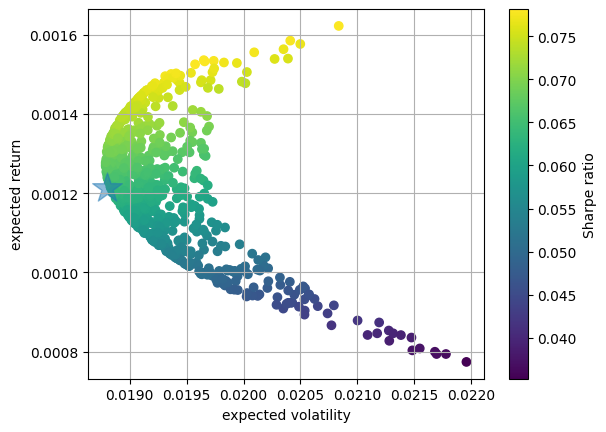

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# MVP와 함께 colorbar로 Sharpe ratio도 표시하는 함수
def plot_MVP_Sr(tickers, start_date, end_date, n_simulations):
    df = yf.download(tickers, start='2019-01-01')['Adj Close']
    returns = df.pct_change(1).dropna()

    ret_portf, vol_portf = [], []  # 포트폴리오의 returns & volatility
    num_assets = len(tickers)
    ret_mean = returns.mean()
    cov_mtx = returns.cov()

    for _ in range(n_simulations):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights) # normalize so that sum of weights to be 1
        ret_portf.append(np.sum(ret_mean * weights))
        vol_portf.append(np.sqrt(np.dot(np.dot(weights.T, cov_mtx), weights)))

    ret_portf = np.array(ret_portf)
    vol_portf = np.array(vol_portf)

    # minimize variance
    import scipy.optimize as sco

    def obj(weights):
        return np.sqrt(np.dot(np.dot(weights.T, cov_mtx), weights))

    w = np.ones(num_assets) / num_assets
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bnds = tuple((0, 1) for _ in range(num_assets))
    opt = sco.minimize(obj, w, method='SLSQP', bounds=bnds, constraints=cons)

    w_opt = opt['x']
    ret_opt = np.sum(ret_portf.mean() * opt['x'])
    vol_opt = np.sqrt(np.dot(np.dot(opt['x'].T, cov_mtx), opt['x']))

    plt.scatter(vol_portf, ret_portf, c=ret_portf/vol_portf, marker='o')
    plt.grid(True)
    plt.xlabel('expected volatility')
    plt.ylabel('expected return')
    plt.colorbar(label='Sharpe ratio')
    plt.scatter(vol_opt, ret_opt, marker='*', s=500, alpha=0.5)  # s는 마커의 크기를 설정
    plt.show()

tickers = ['AAPL', 'MSFT', 'AMZN']
start_date = '2010-01-01'
end_date = '2020-02-01'
n_simulations = 750
plot_MVP_Sr(tickers, start_date, end_date, n_simulations)

[*********************100%***********************]  3 of 3 completed


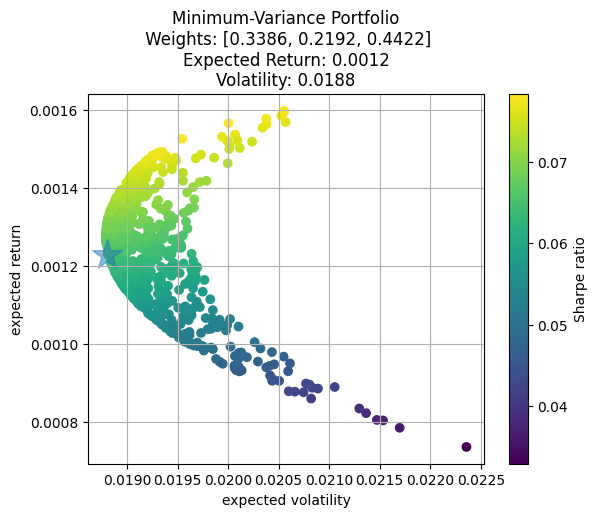

In [ ]:
# 위 코드에 title에 Min-Variance Weights/expected returns/expected volatility를 표기해주는 코드만 추가
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# MVP와 함께 colorbar로 Sharpe ratio도 표시하는 함수
def plot_MVP_Sr(tickers, start_date, end_date, n_simulations):
    df = yf.download(tickers, start='2019-01-01')['Adj Close']
    returns = df.pct_change(1).dropna()

    ret_portf, vol_portf = [], []  # 포트폴리오의 returns & volatility
    num_assets = len(tickers)
    ret_mean = returns.mean()
    cov_mtx = returns.cov()

    for _ in range(n_simulations):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights) # normalize so that sum of weights to be 1
        ret_portf.append(np.sum(ret_mean * weights))
        vol_portf.append(np.sqrt(np.dot(np.dot(weights.T, cov_mtx), weights)))

    ret_portf = np.array(ret_portf)
    vol_portf = np.array(vol_portf)

    # minimize variance
    import scipy.optimize as sco

    def obj(weights):
        return np.sqrt(np.dot(np.dot(weights.T, cov_mtx), weights))

    w = np.ones(num_assets) / num_assets
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bnds = tuple((0, 1) for _ in range(num_assets))
    opt = sco.minimize(obj, w, method='SLSQP', bounds=bnds, constraints=cons)

    w_opt = opt['x']
    ret_opt = np.sum(ret_portf.mean() * opt['x'])
    vol_opt = np.sqrt(np.dot(np.dot(opt['x'].T, cov_mtx), opt['x']))

    plt.scatter(vol_portf, ret_portf, c=ret_portf/vol_portf, marker='o')
    plt.grid(True)
    plt.xlabel('expected volatility')
    plt.ylabel('expected return')

    w_opt_rounded = [round(weight, 4) for weight in w_opt]
    ret_opt_rounded = round(ret_opt, 4)
    vol_opt_rounded = round(vol_opt, 4)
    title = f"Minimum-Variance Portfolio\n Weights: {w_opt_rounded}\nExpected Return: {ret_opt_rounded}\nVolatility: {vol_opt_rounded}"
    plt.title(title)

    plt.colorbar(label='Sharpe ratio')
    plt.scatter(vol_opt, ret_opt, marker='*', s=500, alpha=0.5)  # s는 마커의 크기를 설정
    plt.show()

tickers = ['AAPL', 'MSFT', 'AMZN']
start_date = '2010-01-01'
end_date = '2020-02-01'
n_simulations = 750
plot_MVP_Sr(tickers, start_date, end_date, n_simulations)

## 4. PyPortfolioOpt 패키지와 pulp를 이용하는 방법
PyPortfolioOpt 패키지는 [링크](https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html)에서 정보를 확인할 수 있으니 한 번 읽어보자.

[blog](https://skyeong.net/271)에서 참조:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime

In [ ]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'NFLX', 'GOOGL']
num_assets = len(tickers)
weights = np.ones(num_assets) / num_assets
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
start_date = '2013-01-01'
today = datetime.today().strftime('%Y-%m-%d')

df = pd.DataFrame()
for stock in tickers:
    df[stock] = yf.download(stock, start=start_date, end=today)['Adj Close']
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,AMZN,NFLX,GOOGL
Date,,,,,
2013-01-02,16.813858,22.668232,12.8655,13.144286,18.099348
2013-01-03,16.601633,22.364571,12.9240,13.798571,18.109859
2013-01-04,16.139200,21.945997,12.9575,13.711429,18.467718
2013-01-07,16.044260,21.904961,13.4230,14.171429,18.387136
2013-01-08,16.087442,21.790060,13.3190,13.880000,18.350851


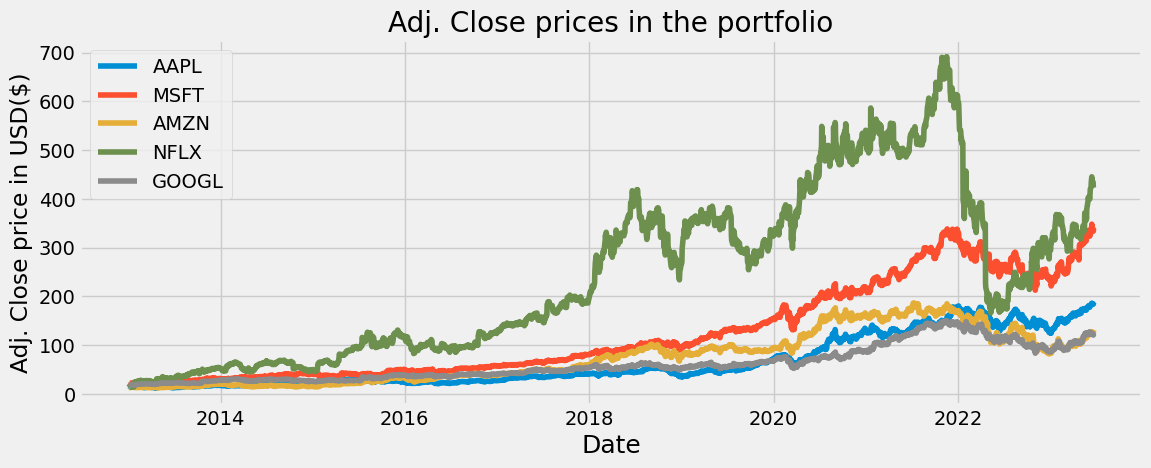

In [ ]:
plt.figure(figsize=(12.2,4.5))
for c in df.columns.values:
    plt.plot(df[c], label=c)
plt.title('Adj. Close prices in the portfolio')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Close price in USD($)')
plt.legend()
plt.show()

In [ ]:
returns = df.pct_change().dropna()
returns

,AAPL,MSFT,AMZN,NFLX,GOOGL
Date,,,,,
2013-01-03,-0.012622,-0.013396,0.004547,0.049777,0.000581
2013-01-04,-0.027855,-0.018716,0.002592,-0.006315,0.019760
2013-01-07,-0.005883,-0.001870,0.035925,0.033549,-0.004363
2013-01-08,0.002691,-0.005245,-0.007748,-0.020565,-0.001973
2013-01-09,-0.015629,0.005650,-0.000113,-0.012865,0.006573
...,...,...,...,...,...
2023-06-15,0.011199,0.031897,0.005458,0.010003,0.011482
2023-06-16,-0.005860,-0.016576,-0.012745,-0.029892,-0.012471
2023-06-20,0.000487,-0.012503,0.002311,0.006343,-0.003481


In [ ]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,AAPL,MSFT,AMZN,NFLX,GOOGL
AAPL,0.082820,0.048710,0.047684,0.043562,0.044989
MSFT,0.048710,0.073520,0.053180,0.050645,0.051474
AMZN,0.047684,0.053180,0.107447,0.074012,0.056494
NFLX,0.043562,0.050645,0.074012,0.224347,0.055392
GOOGL,0.044989,0.051474,0.056494,0.055392,0.075058


In [ ]:
var_portf = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
var_portf

0.06461886495407164

In [ ]:
vol_portf = np.sqrt(var_portf)
vol_portf

0.2542024094183052

In [ ]:
SimpleAnnualReturn_portf = np.sum(returns.mean() * weights) * 250
print('Expected annual return:', round(SimpleAnnualReturn_portf, 4) * 100, '%')
print('Annual volatility/risk/std. dev.:', round(vol_portf, 4) * 100, '%')
print('Annual variance:', round(var_portf, 4) * 100, '%')

Expected annual return: 29.9 %
Annual volatility/risk/std. dev.: 25.419999999999998 %
Annual variance: 6.460000000000001 %


위 예상 수익률과 리스크를 상회하는 최적 포트폴리오를 찾아본다

(여기서 optimal은 Sharpe ratio를 최대화하는 포트폴리오를 구축한다는 의미이다):

In [ ]:
pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# expected annual returns & sample covariaance matrix
mu = expected_returns.mean_historical_return(df)
C = risk_models.sample_cov(df)

ef = EfficientFrontier(mu, C)
weights = ef.max_sharpe()  # get raw weights maximizing Sharpe ratio
weights_cleaned = ef.clean_weights()  # 계산된 비중(weights)을 정리하여 불필요한 작은 값이나 오차를 제거
print(weights_cleaned)
ef.portfolio_performance(verbose=True)  # 최적화된 포트폴리오의 성과를 출력/verbose='True'로 설정하면 자세하게 출력/출력 결과에는 포트폴리오의 예상 연간 수익률, 예상 연간 변동성, 샤프 지수가 포함된다.

OrderedDict([('AAPL', 0.21527), ('MSFT', 0.57308), ('AMZN', 0.0), ('NFLX', 0.21165), ('GOOGL', 0.0)])
Expected annual return: 30.8%
Annual volatility: 25.8%
Sharpe Ratio: 1.12


(0.3084170323253436, 0.2575017079093941, 1.1200587159865656)

In [29]:
weights

OrderedDict([('AAPL', 0.21527),
             ('MSFT', 0.57308),
             ('AMZN', 0.0),
             ('NFLX', 0.21165),
             ('GOOGL', 0.0)])

In [30]:
weights_cleaned

OrderedDict([('AAPL', 0.21527),
             ('MSFT', 0.57308),
             ('AMZN', 0.0),
             ('NFLX', 0.21165),
             ('GOOGL', 0.0)])


ef.max_sharpe(): 샤프 지수를 최대화하는 최적의 비중(weights)을 계산합니다. 최적화는 주어진 평균 연간 수익률(mu)와 공분산 행렬(C)을 기반으로 이루어집니다.

ef.clean_weights(): 계산된 비중(weights)을 정리하여 불필요한 작은 값이나 오차를 제거합니다.

ef.portfolio_performance(verbose=True): 최적화된 포트폴리오의 성과를 출력합니다. 이때, verbose 매개변수를 True로 설정하면 자세한 결과를 확인할 수 있습니다. 출력 결과에는 포트폴리오의 예상 연간 수익률, 예상 연간 변동성, 샤프 지수가 포함됩니다.

Sharpe ratio-maximizing 포트폴리오에서 Sharpe ratio = 1.12 로 나타났다.

In [ ]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 31.6 MB/s eta 0:00:00


In [ ]:
'''
각 자산의 개별 할당량을 (weights_cleaned에 따라) 계산
이를 위해 pip install pulp 필요
'''
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = weights_cleaned

# 위 포트폴리오에 15000 USD를 투자하는 경우
'''
DiscreteAllocation(): 이 클래스는 최적화된 비중(weights)과 최신 가격 정보(latest_prices)를 사용하여 개별 자산에 할당할 수 있는 최대 수량을 계산하는 기능을 제공
da.lp_portfolio(): linear programming을 사용하여 최대 수량 할당을 계산
'''
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)
allocation, leftover = da.lp_portfolio()

print("Discrete allocation: ", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation:  {'MSFT': 27, 'AMZN': 7, 'NFLX': 9, 'GOOGL': 8}
Funds remaining: $129.26


# #5.